In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Fashiom MNIST

### We want to classify these four classes
Dress , Coat , Shirt , Sneaker


In [2]:
#import all the necessary libraties
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

import random
import os

In [60]:
#let's import our data set from kaggle
df_train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
df_test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [61]:
#let's see how our dataset looks like
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_train.shape

(60000, 785)

In [63]:
df_test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_test.shape

(10000, 785)

We want to classify only this labels so delete row containing other labels

3: Dress --> new label :- 0

4: Coat --> new label :- 1

6: Shirt --> new label :- 2

7: Sneaker --> new label-> 3


In [64]:
df_train=df_train[df_train['label'].isin([3,4,6,7])]

In [32]:
df_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0


In [65]:
replacement_mapping_dict = {
    3:0,
    4:1,
    6:2,
    7:3
}
df_train["label"].replace(replacement_mapping_dict,inplace=True)

In [66]:
df_train.reset_index(inplace=True,drop=True)
df_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0


In [67]:
#do same for test data
df_test=df_test[df_test['label'].isin([3,4,6,7])]
df_test["label"].replace(replacement_mapping_dict,inplace=True)
df_test.reset_index(inplace=True,drop=True)
df_test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,12,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,1,0,...,2,0,21,138,151,71,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,118,73,0,164,225,123,0,0,0,0


Both datasets have 785 columns. The first column presents the class labels,while the remaining columns contains the pixel values. 
each image is 28 pixels in height and 28 pixels in width (for a total of 784 pixels).

### Let's Visualize the images and do some preprocessing part

In [23]:
import tensorflow as tf
from tensorflow import keras

2021-09-18 11:37:50.159064: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-18 11:37:50.159199: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [25]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 4

def data_preprocessing(raw):
    out_y = keras.utils.to_categorical(raw.label, 4) 
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    
    # Reshaping to (num_images, Width, Height, Colour Channels) to pass as input to CNN
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    
    #we have enough images so no need to Data Augmentation Simply divide each pixel value by 255 to normalize them
    out_x = x_shaped_array / 255
    
    return out_x, out_y

In [68]:
X, Y = data_preprocessing(df_train)
X_test, Y_test = data_preprocessing(df_test)

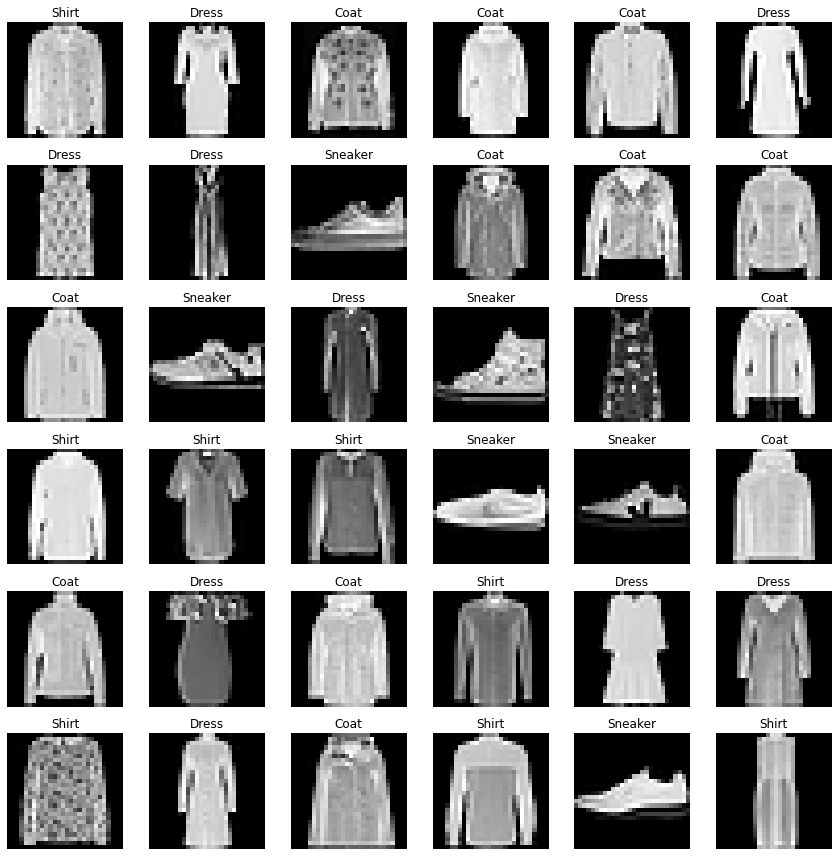

In [70]:
labels_list = ['Dress', 'Coat','Shirt','Sneaker']

plt.figure(figsize=(12,12))

for i in range(0, 36):
    plt.subplot(6,6,i + 1)
    plt.imshow(X[i], cmap=plt.get_cmap('gray'))
    plt.title(labels_list[df_train.iloc[i, 0]])
    plt.axis("off")

plt.tight_layout()

plt.show()

In [71]:
#let's check if the class is imbalance or not
print('Train Set Class Distribution:\n')
print(df_train['label'].value_counts())

print('\nTest Set Class Distribution:\n')
print(df_test['label'].value_counts())

Train Set Class Distribution:

2    6000
0    6000
1    6000
3    6000
Name: label, dtype: int64

Test Set Class Distribution:

0    1000
2    1000
1    1000
3    1000
Name: label, dtype: int64


we have 6000 image of each class to train

# Let's Create Model

In [76]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model

divide our data into train and test

In [77]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

## Define our model

In [78]:
def get_model():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_ROWS, IMG_COLS, 1))
    
    # Block One
    x = layers.BatchNormalization()(inputs)
    x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.25)(x)

    # Block Two
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.25)(x)
    
    # Block Three
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.25)(x)
    
    #flatten our layer and dense network
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    
    #Final Layer (Output)
    output = layers.Dense(NUM_CLASSES, activation='softmax')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model


In [79]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='categorical_crossentropy',optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics='accuracy')

model.summary()

2021-09-18 12:04:58.270484: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-18 12:04:58.274970: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-18 12:04:58.275018: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-18 12:04:58.275062: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (79e63505d1ca): /proc/driver/nvidia/version does not exist
2021-09-18 12:04:58.275457: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496 

In [81]:
#Setting early_stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    min_delta=0.0000001,
    restore_best_weights=True,
)

In [85]:
history = model.fit(X_train, Y_train,batch_size = 128, epochs = 10,validation_data=(X_val, Y_val),callbacks=[early_stopping]);

Epoch 1/10
150/150 [==============================] - 29s 195ms/step - loss: 0.1637 - accuracy: 0.9389 - val_loss: 0.1608 - val_accuracy: 0.9346
Epoch 2/10
150/150 [==============================] - 29s 194ms/step - loss: 0.1547 - accuracy: 0.9414 - val_loss: 0.2038 - val_accuracy: 0.9235
Epoch 3/10
150/150 [==============================] - 29s 194ms/step - loss: 0.1500 - accuracy: 0.9419 - val_loss: 0.1753 - val_accuracy: 0.9358
Epoch 4/10
150/150 [==============================] - 29s 192ms/step - loss: 0.1486 - accuracy: 0.9430 - val_loss: 0.1743 - val_accuracy: 0.9335
Epoch 5/10
150/150 [==============================] - 29s 190ms/step - loss: 0.1403 - accuracy: 0.9467 - val_loss: 0.1507 - val_accuracy: 0.9400
Epoch 6/10
150/150 [==============================] - 29s 191ms/step - loss: 0.1313 - accuracy: 0.9502 - val_loss: 0.1785 - val_accuracy: 0.9331
Epoch 7/10
150/150 [==============================] - 28s 188ms/step - loss: 0.1294 - accuracy: 0.9503 - val_loss: 0.1691 - val_ac

# Plot Accuracy and Loss Matrix

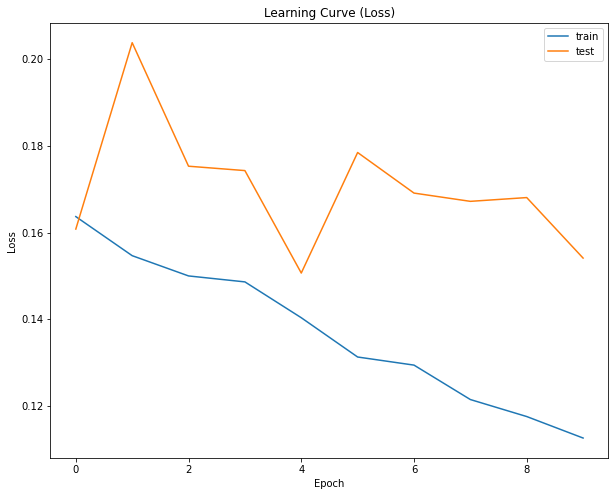

In [87]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['train', 'test'], loc='best')
plt.show()

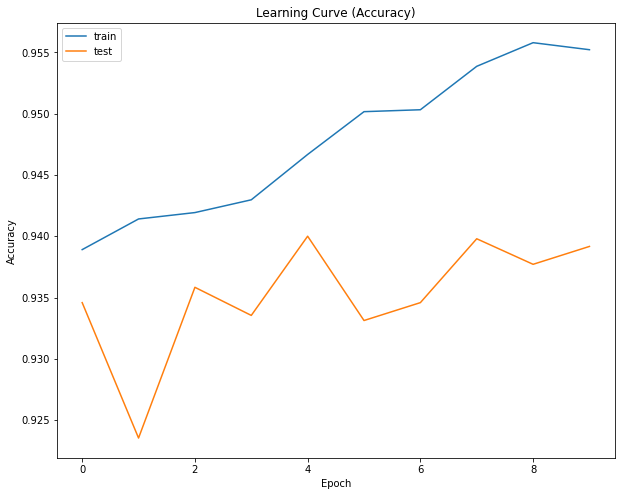

In [89]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['train', 'test'], loc='best')
plt.show()

In [90]:
score = model.evaluate(X_val, Y_val, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.15410757064819336
Val accuracy: 0.9391666650772095


# Let's check model accuracy and performance on test set

In [91]:
predictions = model.predict(X_test)
pred_labels = predictions.argmax(axis=-1) #take a class with highest probability
print("Test Accuracy: ", accuracy_score(df_test['label'], pred_labels))

Test Accuracy:  0.952


# Classification Report

In [92]:
print(metrics.classification_report(df_test['label'], pred_labels, target_names=labels_list))

              precision    recall  f1-score   support

       Dress       0.95      0.95      0.95      1000
        Coat       0.93      0.93      0.93      1000
       Shirt       0.93      0.93      0.93      1000
     Sneaker       1.00      1.00      1.00      1000

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

